Sheet 07

(a)

(b)

In [40]:
import numpy as np
import matplotlib.pyplot as plt

(array([ 1.,  0.,  0.,  0.,  2.,  1.,  0.,  0.,  1.,  0.,  0.,  1.,  0.,
         0.,  3.,  6.,  5.,  2.,  5.,  3.,  4.,  7.,  6.,  3.,  6., 10.,
         4.,  7.,  6., 10., 11., 18., 12., 11., 19., 14., 13., 26., 21.,
        15., 20., 24., 21., 19., 27., 28., 23., 25., 19., 26., 34., 25.,
        19., 30., 26., 26., 25., 17., 25., 23., 23., 24., 21., 17., 14.,
        19., 13., 16., 16., 11., 14.,  5.,  8.,  4.,  5.,  7.,  5.,  7.,
         4.,  2.,  2.,  1.,  4.,  2.,  1.,  1.,  2.,  1.,  0.,  5.,  4.,
         0.,  1.,  2.,  1.,  1.,  1.,  0.,  0.,  1.]),
 array([ 3.7265101 ,  3.85090718,  3.97530426,  4.09970134,  4.22409842,
         4.34849551,  4.47289259,  4.59728967,  4.72168675,  4.84608383,
         4.97048091,  5.09487799,  5.21927507,  5.34367215,  5.46806923,
         5.59246631,  5.71686339,  5.84126048,  5.96565756,  6.09005464,
         6.21445172,  6.3388488 ,  6.46324588,  6.58764296,  6.71204004,
         6.83643712,  6.9608342 ,  7.08523128,  7.20962836,  7.334025

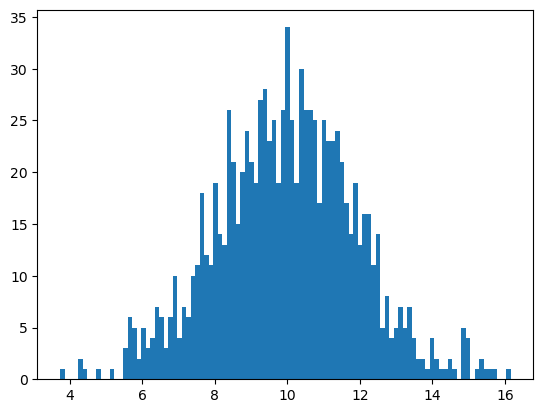

In [41]:
def kog_smir_test(X, Y, alpha):
    if len(X) != len(Y):
        print("X and Y have different binning")
        return False
    else:
        X_cum = np.cumsum(X)/np.sum(X)
        Y_cum = np.cumsum(Y)/np.sum(Y)
        d_max = np.max(np.abs(X_cum - Y_cum))
        d_alpha = np.sqrt(-np.log(alpha/2)/(2*len(X)))
        return d_max < d_alpha


def data(mu, size=10000, bins=100):
    #aus (a)
    sigma = np.sqrt(mu)
    X = np.random.normal(mu, sigma, size)
    Y = np.random.poisson(mu, size)
    X = np.round(X)
    




